## T1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hint: You can use this function to get gaussian distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
from scipy.stats import multivariate_normal

In [2]:
class GMM:
  def __init__(self, mixture_weight, mean_params, cov_params):
    """
    Initialize GMM.
    """
    # Copy construction values.
    self.mixture_weight = mixture_weight
    self.mean_params = mean_params + 1e-9 # Add epsilon to avoid zero mean
    self.cov_params = cov_params + 1e-9 # Add epsilon to avoid zero covariance

    # Add w to print in each iteration
    self.w = np.array([])

    # Initiailize iteration.
    self.n_iter = 0

  def estimation_step(self, data):
    """
    TODO: Perform estimation step. Then, return w_{n,j} in eq. 1)
    """
    
    prob = np.array([multivariate_normal(mean=self.mean_params[i], cov=self.cov_params[i]).pdf(data) for i in range(len(self.mean_params))])
    prob_m = np.dot(np.eye(len(self.mixture_weight)) * self.mixture_weight, prob)
    
    w = prob_m / np.sum(prob_m, axis=0)
  
    return w


  def maximization_step(self, data, w):
    """
    TODO: Perform maximization step.
        (Update parameters in this GMM model.)
    """

    # Change weights
    self.mixture_weight = (1 / len(data)) * np.sum(w, axis=1)

    # Change means
    self.mean_params = (np.dot(w, data).T / (w.sum(axis=1) + 1e-9)).T # Add epsilon to avoid zero mean

    # Change covariances
    self.cov_params = np.array([np.dot((w[i].reshape(-1,1) * (data-self.mean_params[i])).T, (data-self.mean_params[i])) / (np.sum(w[i]) + 1e-9) for i in range(len(self.mean_params))]) # Add epsilon to avoid devided by zero
    self.cov_params = (self.cov_params + 1e-9) * np.eye(self.cov_params.shape[1]) # Add epsilon to avoid zero covariance


  def get_log_likelihood(self, data):
    """
    TODO: Compute log likelihood.
    """
    log_prob = np.log(np.array([multivariate_normal(mean=self.mean_params[i], cov=self.cov_params[i]).pdf(data) * self.mixture_weight[i] for i in range(len(self.mixture_weight))]).sum(axis=0)).sum()

    return log_prob

  def print_iteration(self):
    print("probality of sample (w) :\n", self.w.T)
    print("mixture weight :\n", self.mixture_weight)
    print("mean :\n", self.mean_params)
    print("covariance matrix :\n", self.cov_params)
    print("-------------------------------------------------------------")

  def perform_em_iterations(self, data, num_iterations, display=True):
    """
    Perform estimation & maximization steps with num_iterations.
    Then, return list of log_likelihood from those iterations.
    """
    log_prob_list = []

    # Display initialization.
    if display:
      print("Initialization")
      self.print_iteration()

    for n_iter in range(num_iterations):
      self.w = self.estimation_step(data)
      self.maximization_step(data, self.w)

      # Calculate log prob.
      log_prob = self.get_log_likelihood(data)
      log_prob_list.append(log_prob)

      # Display each iteration.
      if display:
          print(f"Iteration: {n_iter}")
          self.print_iteration()

    return log_prob_list

In [3]:
def perform_gmm(mixture_weight, mean_params, cov_params, data, num_iterations):
  """
  Perform GMM with given parameters.
  """
  # Initialize GMM.
  gmm = GMM(mixture_weight, mean_params, cov_params)

  # Perform EM iterations.
  log_prob_list = gmm.perform_em_iterations(data, num_iterations)

  return gmm.mean_params, log_prob_list

def plot_likelihood_and_data(mean_params, log_prob_list, data):
  # Initialize plot.
  plt.figure(figsize=(16, 10))

  # Plot log likelihood.
  plt.subplot(2, 1, 1)
  plt.plot(log_prob_list)
  plt.ylim(min(log_prob_list) - 1, max(log_prob_list) + 1)
  plt.title("Log Likelihood")
  plt.xlabel("Iteration")
  plt.ylabel("Log Likelihood")

  # Plot data.
  plt.subplot(2, 1, 2)
  plt.grid()
  plt.scatter(x=data[:, 0], y=data[:, 1])
  for idx, mu_cluster in enumerate(mean_params):
     plt.scatter(mu_cluster[0],
                 mu_cluster[1],
                 cmap=idx,
                 marker='x',
                 s=1000)
  plt.show()

In [4]:
num_iterations = 3
num_mixture = 3
mixture_weight = [1] * num_mixture # m
mean_params = np.array([[3,3], [2,2], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

X, Y = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7]), np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.vstack([X,Y]).T

# gmm = GMM(mixture_weight, mean_params, cov_params)
# log_prob_list = gmm.perform_em_iterations(data, num_iterations)
t1_mean_params, t1_prob_list = perform_gmm(mixture_weight = mixture_weight,
                           mean_params = mean_params,
                           cov_params = cov_params,
                           data=data,
                           num_iterations=num_iterations)

Initialization
probality of sample (w) :
 []
mixture weight :
 [1, 1, 1]
mean :
 [[ 3.  3.]
 [ 2.  2.]
 [-3. -3.]]
covariance matrix :
 [[[1.e+00 1.e-09]
  [1.e-09 1.e+00]]

 [[1.e+00 1.e-09]
  [1.e-09 1.e+00]]

 [[1.e+00 1.e-09]
  [1.e-09 1.e+00]]]
-------------------------------------------------------------
Iteration: 0
probality of sample (w) :
 [[1.19202922e-01 8.80797076e-01 1.81545817e-09]
 [7.31058578e-01 2.68941422e-01 1.69570720e-16]
 [2.68941421e-01 7.31058579e-01 1.01529011e-11]
 [9.99983299e-01 1.67014222e-05 2.03105915e-42]
 [9.99088949e-01 9.11051209e-04 5.37528537e-32]
 [9.99876605e-01 1.23394578e-04 3.30529332e-37]
 [2.31952297e-16 1.38879444e-11 1.00000000e+00]
 [2.31952297e-16 1.38879444e-11 1.00000000e+00]
 [3.30570114e-37 5.90009125e-29 1.00000000e+00]]
mixture weight :
 [0.45757242 0.20909425 0.33333333]
mean :
 [[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
covariance matrix :
 [[[4.53619412 0.        ]
  [0.         4.28700611]

## T2

/var/folders/cm/lb23lq6s6f319w__2lgw1zfm0000gn/T/ipykernel_1462/3700186119.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mu_cluster[0],


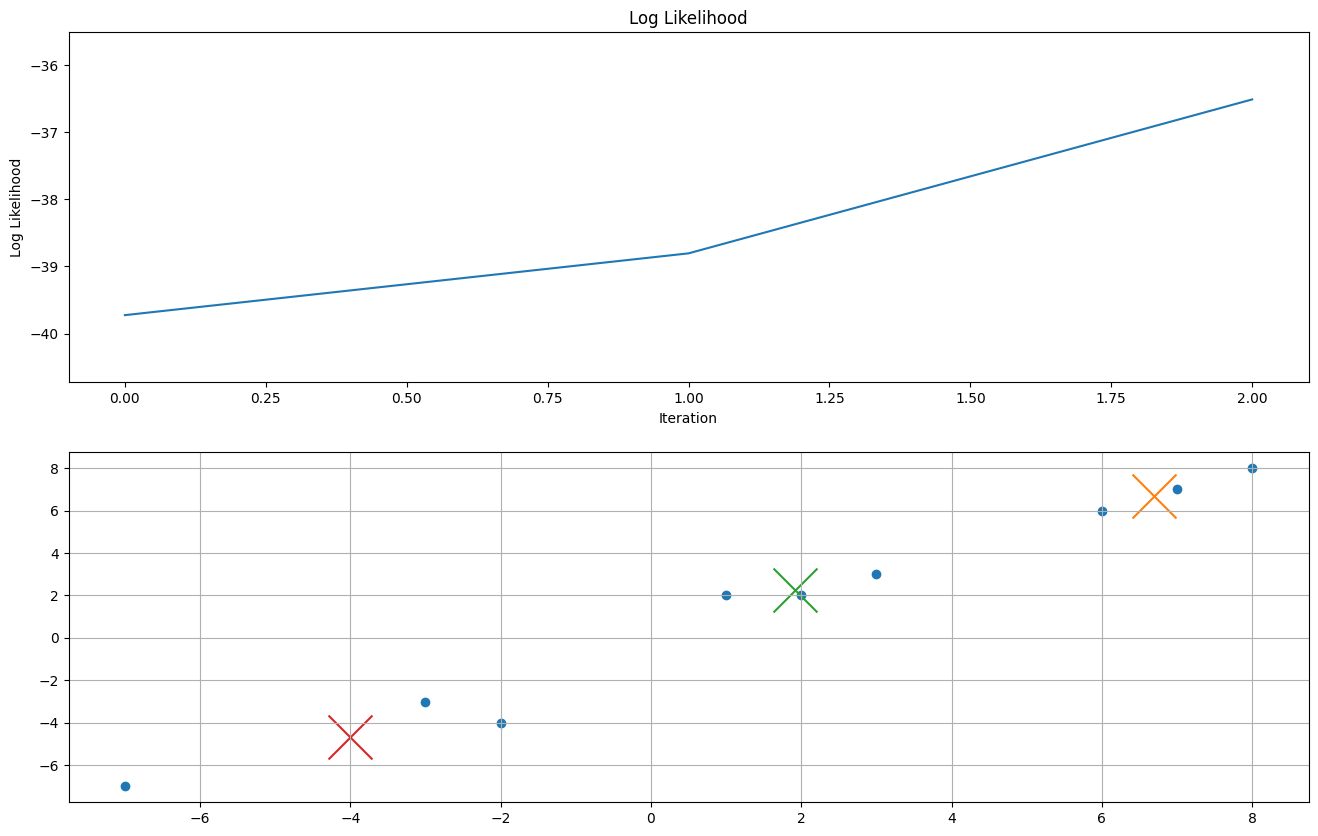

In [5]:
plot_likelihood_and_data(t1_mean_params, t1_prob_list, data)

ANS: Yes, it go up from -39.5 to -36.5

## T3

In [6]:
num_mixture_t3 = 2
mixture_weight_t3 = [1] * num_mixture_t3

mean_params_t3 = np.array([[3,3], [-3,-3]], dtype = float)
cov_params_t3 = np.array([np.eye(2)] * num_mixture_t3)

num_iterations = 3

t3_mean_params, t3_prob_list = perform_gmm(mixture_weight = mixture_weight_t3,
                           mean_params = mean_params_t3,
                           cov_params = cov_params_t3,
                           data=data,
                           num_iterations=num_iterations)

Initialization
probality of sample (w) :
 []
mixture weight :
 [1, 1]
mean :
 [[ 3.  3.]
 [-3. -3.]]
covariance matrix :
 [[[1.e+00 1.e-09]
  [1.e-09 1.e+00]]

 [[1.e+00 1.e-09]
  [1.e-09 1.e+00]]]
-------------------------------------------------------------
Iteration: 0
probality of sample (w) :
 [[9.99999985e-01 1.52299802e-08]
 [1.00000000e+00 2.31952303e-16]
 [1.00000000e+00 3.77513477e-11]
 [1.00000000e+00 2.03109308e-42]
 [1.00000000e+00 5.38018700e-32]
 [1.00000000e+00 3.30570122e-37]
 [2.31952297e-16 1.00000000e+00]
 [2.31952297e-16 1.00000000e+00]
 [3.30570114e-37 1.00000000e+00]]
mixture weight :
 [0.66666666 0.33333334]
mean :
 [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
covariance matrix :
 [[[6.91666665 0.        ]
  [0.         5.88888889]]

 [[4.66666677 0.        ]
  [0.         2.8888891 ]]]
-------------------------------------------------------------
Iteration: 1
probality of sample (w) :
 [[9.99879274e-01 1.20725832e-04]
 [9.99999741e-01 2.59403363e-07]


## T4

/var/folders/cm/lb23lq6s6f319w__2lgw1zfm0000gn/T/ipykernel_1462/3700186119.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mu_cluster[0],


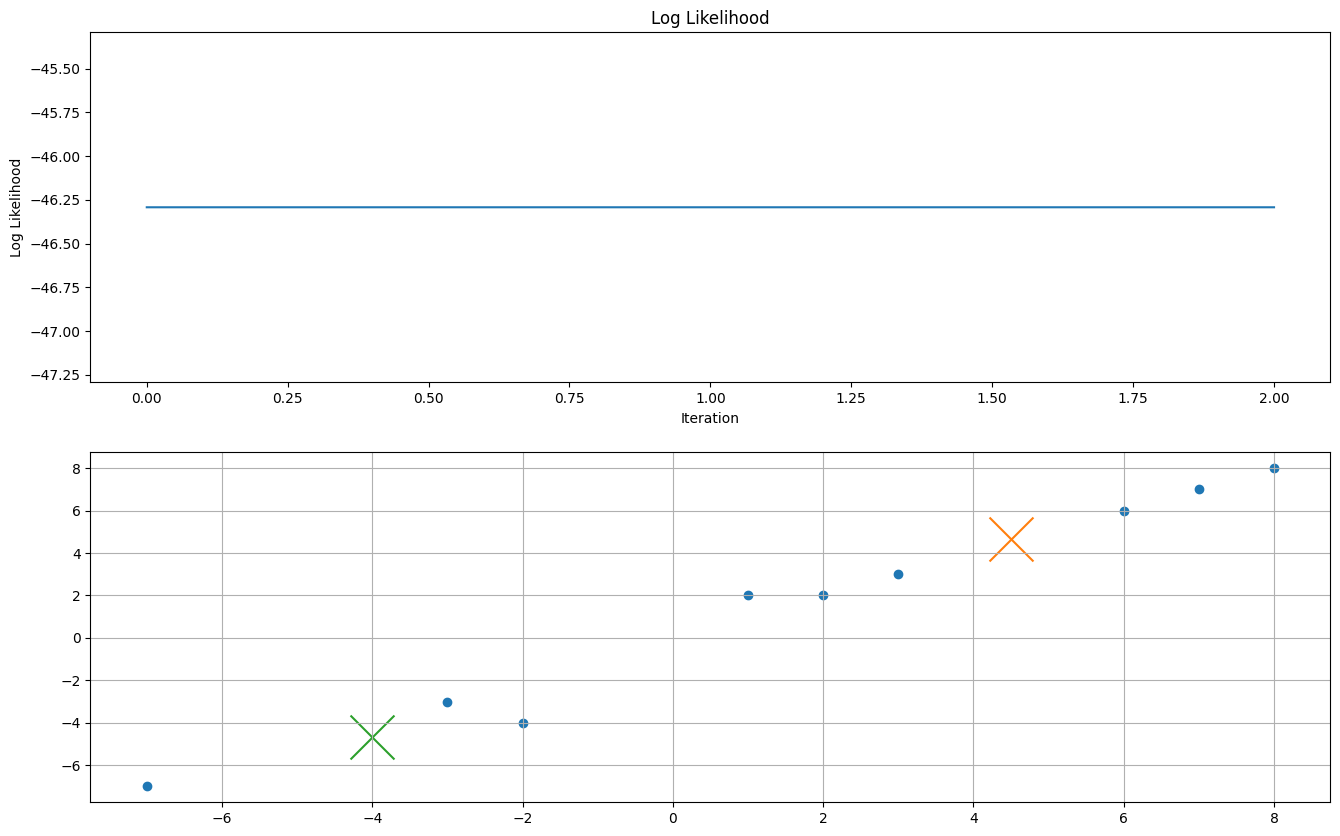

In [7]:
# TODO: Plot log_likelihood from T3
plot_likelihood_and_data(t3_mean_params, t3_prob_list, data)

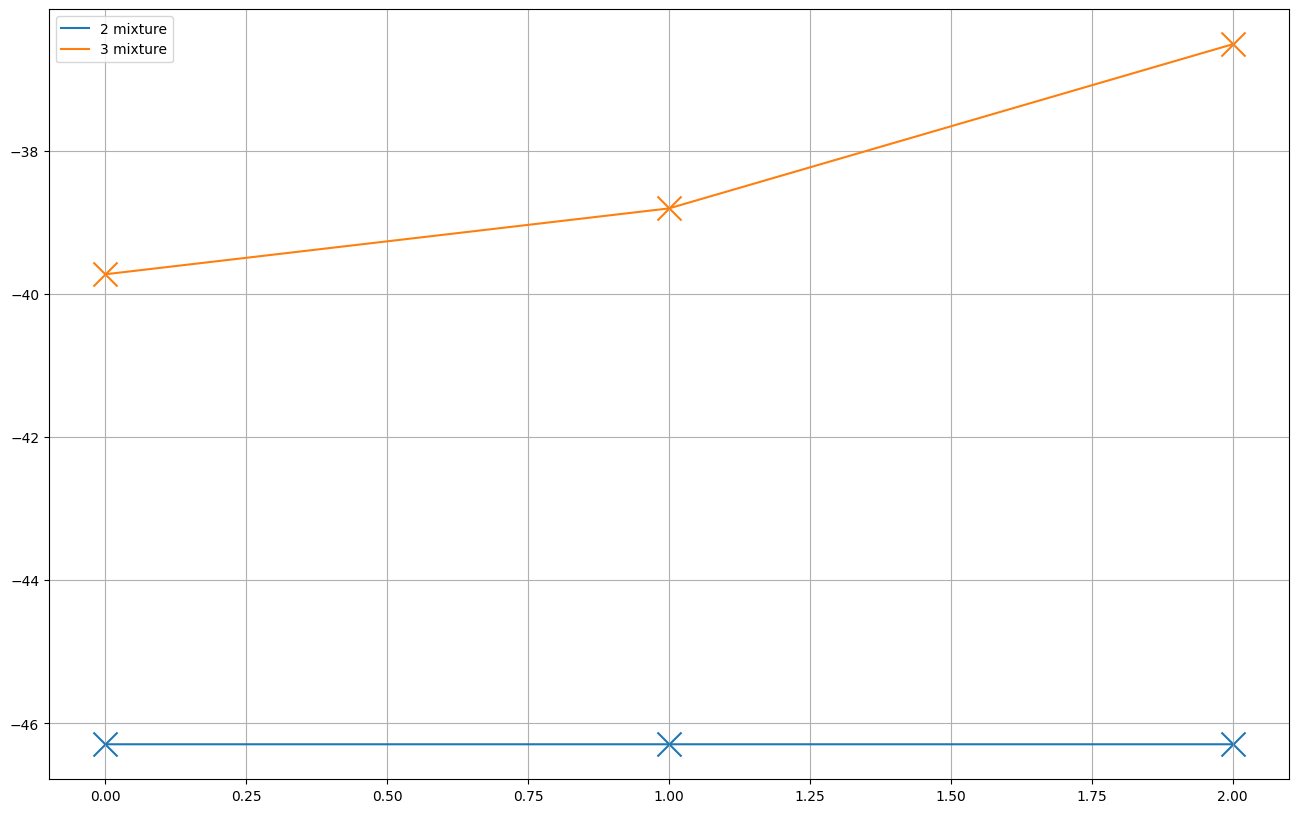

In [8]:
# TODO: Plot Comparision of log_likelihood from T1 and T3

plt.figure(figsize=(16, 10))

plt.plot(np.arange(num_iterations), t3_prob_list, label='2 mixture')
plt.scatter(np.arange(num_iterations), t3_prob_list, marker='x', s=300)
plt.plot(np.arange(num_iterations), t1_prob_list, label='3 mixture')
plt.scatter(np.arange(num_iterations), t1_prob_list, marker='x', s=300)

plt.legend()
plt.grid()

ANS: 3 mixture model has higher likelihood than 2 mixture model.
For 2 mixture models, the likelihood is not significantly change due to the first iteration is already satisfied the clustering so the maximization step will not change the guassian distribution much.

## OT1

In [9]:
num_mixture_ot1 = 2
mixture_weight_ot1 = [1] * num_mixture_ot1

mean_params_ot1 = np.array([[0,0], [10000,10000]], dtype = float)
cov_params_ot1 = np.array([np.eye(2)] * num_mixture_ot1)

num_iterations = 3

ot1_mean_params, ot1_prob_list = perform_gmm(mixture_weight = mixture_weight_ot1,
                           mean_params = mean_params_ot1,
                           cov_params = cov_params_ot1,
                           data=data,
                           num_iterations=num_iterations)

Initialization
probality of sample (w) :
 []
mixture weight :
 [1, 1]
mean :
 [[1.e-09 1.e-09]
 [1.e+04 1.e+04]]
covariance matrix :
 [[[1.e+00 1.e-09]
  [1.e-09 1.e+00]]

 [[1.e+00 1.e-09]
  [1.e-09 1.e+00]]]
-------------------------------------------------------------
Iteration: 0
probality of sample (w) :
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
mixture weight :
 [1. 0.]
mean :
 [[1.66666667 1.55555556]
 [0.         0.        ]]
covariance matrix :
 [[[2.22222222e+01 0.00000000e+00]
  [0.00000000e+00 2.42469136e+01]]

 [[1.00000000e-09 0.00000000e+00]
  [0.00000000e+00 1.00000000e-09]]]
-------------------------------------------------------------
Iteration: 1
probality of sample (w) :
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
mixture weight :
 [1. 0.]
mean :
 [[1.66666667 1.55555556]
 [0.         0.        ]]
covariance matrix :
 [[[2.22222222e+01 0.00000000e+00]
  [0.00000000e+00 2.42469136e+01]]



ANS: It can not determine the PDF of the data. To fix this problem, we initialize the mean and variance of the guassian distribution with the given value and add epsilon to mean and variance to avoid the zero. Also, every time we devide with sum of probability, we add epsilon to avoid the zero.

# The face database

In [10]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float

# Change path to your facedata.mat file.
facedata_path = 'facedata.mat'

data = scipy.io.loadmat(facedata_path)
data_size = data['facedata'].shape

%matplotlib inline
data_size

(40, 10)

Preprocess xf

In [11]:
xf = np.zeros((data_size[0], data_size[1], data['facedata'][0,0].shape[0], data['facedata'][0,0].shape[1]))
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        xf[i,j] = img_as_float(data['facedata'][i,j])

image_height = xf.shape[2]
image_width = xf.shape[3]

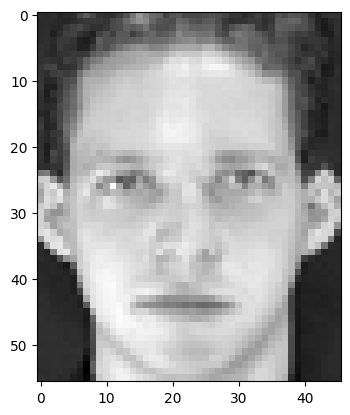

In [12]:
# Example: Ploting face image.
# xf[person n, image i]
plt.imshow(xf[0,0], cmap = 'gray')
plt.show()

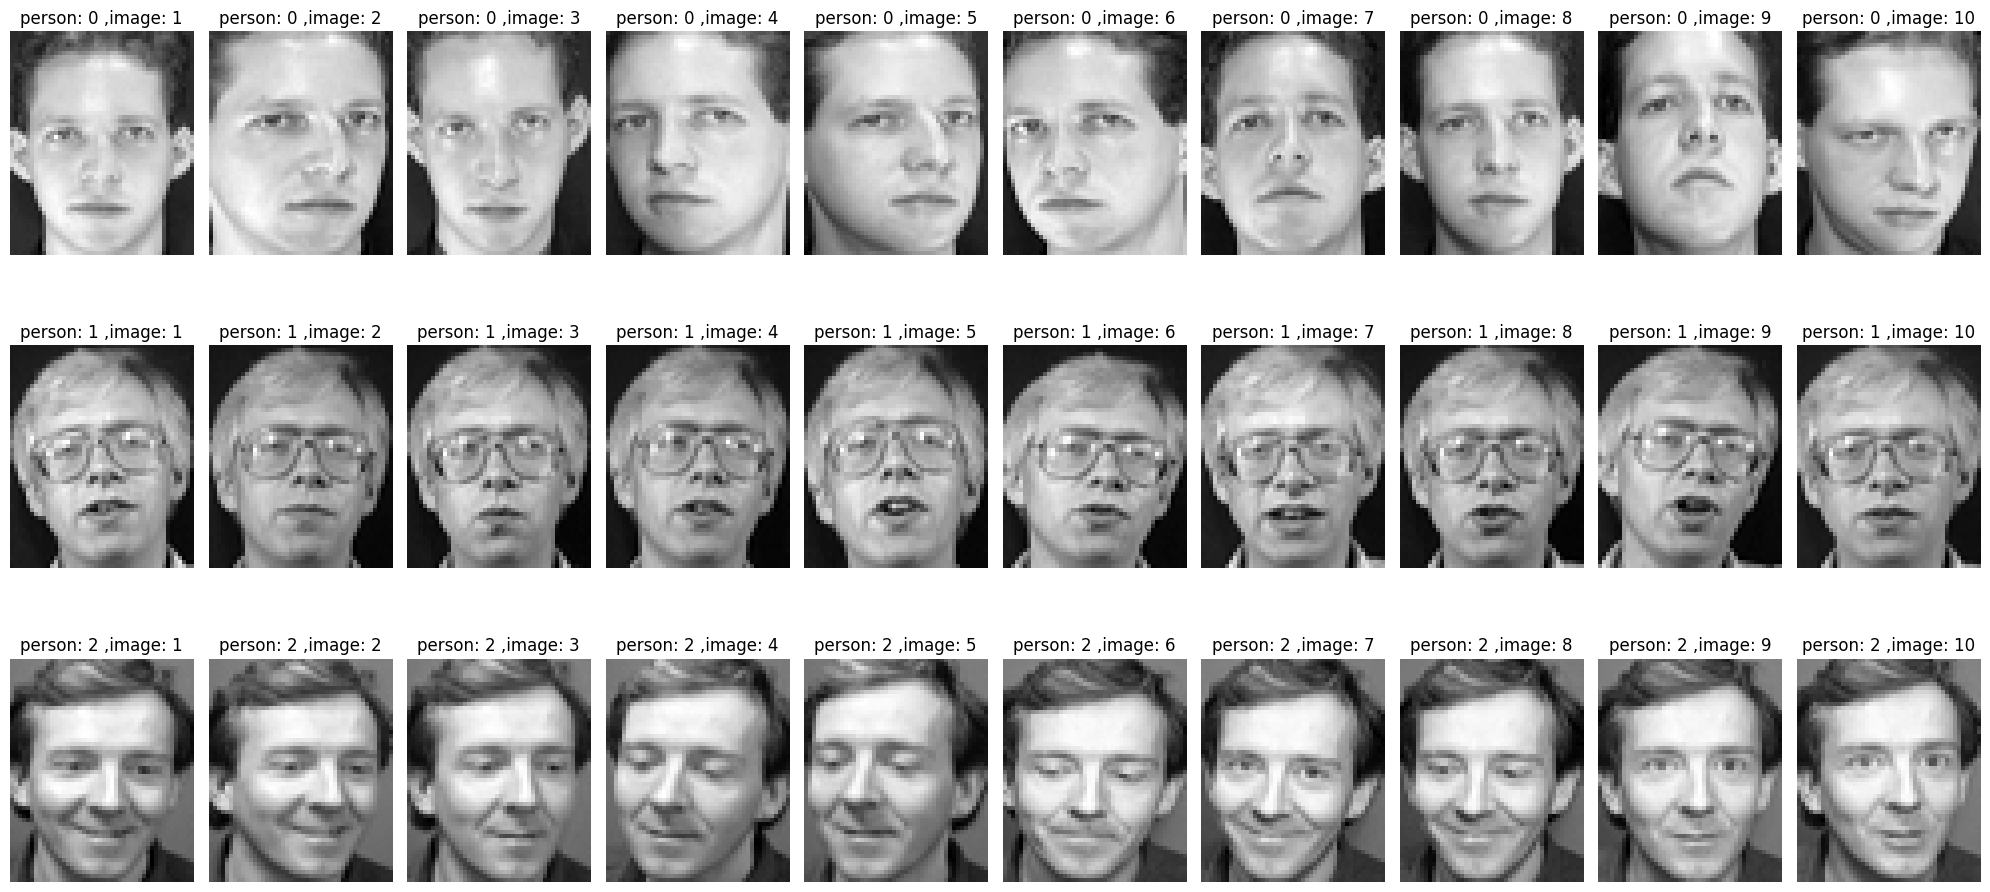

In [13]:
plt.figure(figsize=(20, 10))
for idx in range(30):
    plt.subplot(3, 10 , idx+1)
    plt.title(f"person: {idx//10} ,image: {idx%10 + 1}")
    plt.imshow(xf[idx//10, idx%10], cmap = 'gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

## T5

In [14]:
def L2_dist(x1, x2):
    """
    TODO: Calculate L2 distance.
    """

    return np.sqrt(np.sum((np.square(x1-x2))))

# Test L2_dist
def test_L2_dist():
    assert L2_dist(np.array([1, 2, 3]), np.array([1, 2, 3])) == 0.0
    assert L2_dist(np.array([0, 0, 0]), np.array([1, 2, 3])) == np.sqrt(14)

test_L2_dist()

print('Euclidean distance between xf[0,0] and xf[0,1] is', L2_dist(xf[0,0], xf[0,1]))
print('Euclidean distance between xf[0,0] and xf[1,0] is', L2_dist(xf[0,0], xf[1,0]))

Euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165492
Euclidean distance between xf[0,0] and xf[1,0] is 8.173295099737281


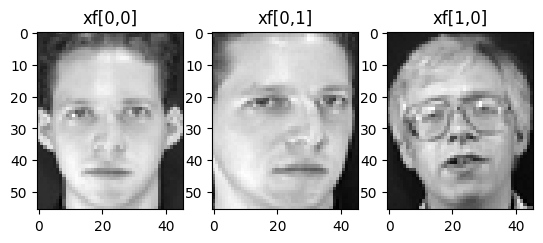

In [15]:
plt.subplot(1, 3, 1)
plt.title(f"xf[0,0]")
plt.imshow(xf[0, 0], cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title(f"xf[0,1]")
plt.imshow(xf[0, 1], cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title(f"xf[1,0]")
plt.imshow(xf[1, 0], cmap = 'gray')

plt.show()

ANS: Make sense, because xf[0,0] and xf[0,1] has different orentation even it is the same person so the distance between them is larger (due to the different of pixel) than xf[1,0] which is different person but same orentation.

ANS: This number cannot use for face verification because we want the same person has small distance and different person has large distance to distinguish the person. However, the distance between the same person is larger than the distance between different person. This is because the distance is calculated by the difference of the pixel value. The pixel value of the same person is not exactly the same due to the different light, angle, and expression.

## T6

In [16]:
def organize_shape(matrix):
    """
    TODO (Optional): Reduce matrix dimension of 2D image to 1D and merge people and image dimension.
    This function can be useful at organizing matrix shapes.

    Example:
        Input shape: (people_index, image_index, image_shape[0], image_shape[1])
        Output shape: (people_index*image_index, image_shape[0]*image_shape[1])
    """
    output = matrix.copy()
    output = output.reshape((matrix.shape[0]*matrix.shape[1], matrix.shape[2]*matrix.shape[3]))
    return output


def generate_similarity_matrix(A, B):
    """
    TODO: Calculate similarity matrix M,
    which M[i, j] is a distance between A[i] and B[j].
    """

    similarity_matrix = np.zeros((A.shape[0], B.shape[0]))
    for i in range(A.shape[0]):
        for j in range(B.shape[0]):
            similarity_matrix[i][j] = L2_dist(A[i], B[j])

    return similarity_matrix

def test_generate_similarity_matrix():
    test_A = np.array([[1, 2], [3,4]])
    test_B = np.array([[1, 2], [5, 6], [7, 8]])
    expected_matrix = np.sqrt(np.array([[0, 32, 72], [8, 8, 32]]))
    assert (generate_similarity_matrix(test_A, test_B) == expected_matrix).all()

test_generate_similarity_matrix()

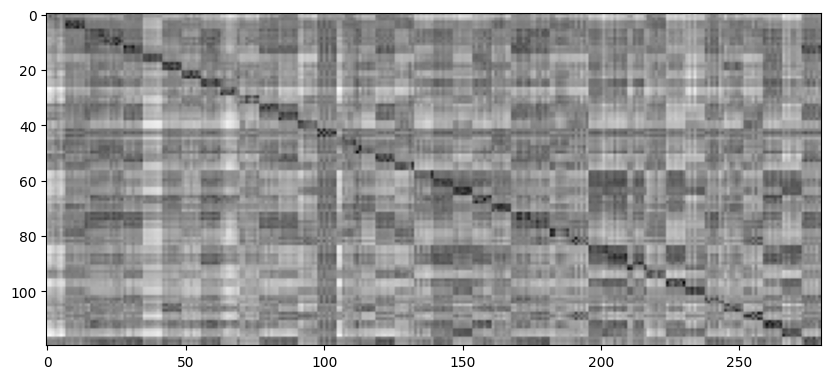

In [17]:
T = organize_shape(xf[:, :3])
D = organize_shape(xf[:, 3:])

similarity_matrix = generate_similarity_matrix(T, D)

plt.figure(figsize=(10, 10))
plt.imshow(similarity_matrix, cmap='gray')

## T7

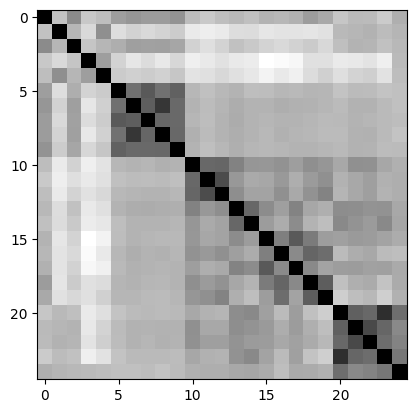

In [18]:
example_sim_mat = organize_shape(xf[:5, :5])

plt.imshow(generate_similarity_matrix(example_sim_mat, example_sim_mat), cmap='gray')

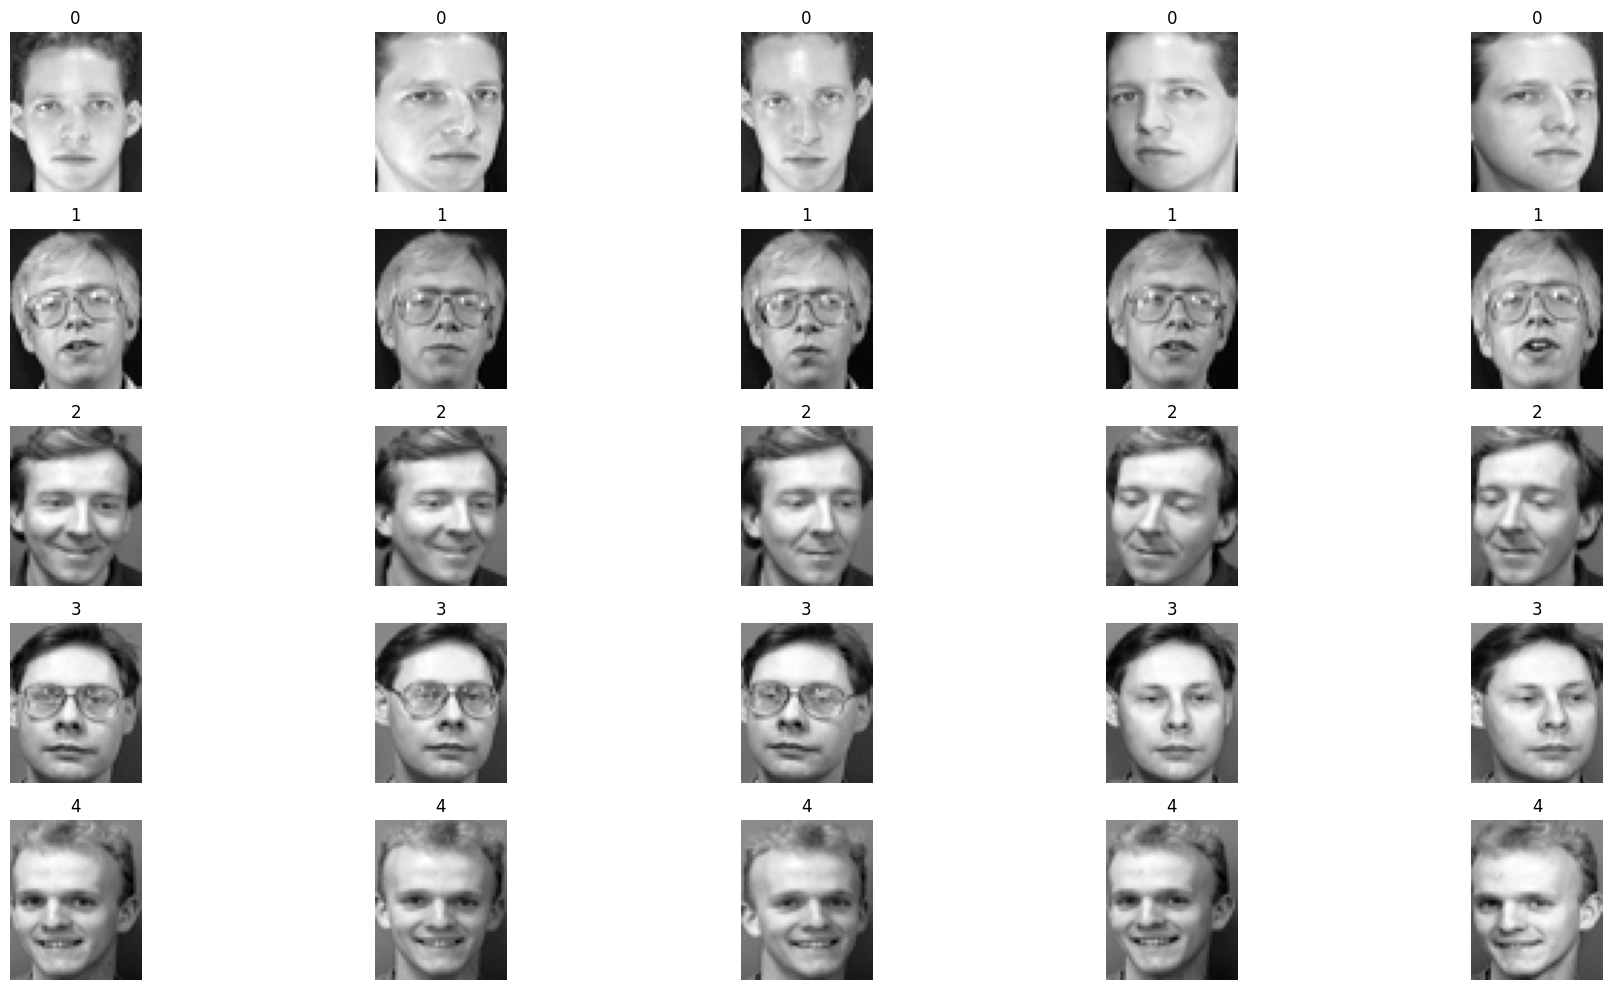

In [19]:
plt.figure(figsize=(20, 10))
for person_i in range(5):
    for img_i in range(5):
        plt.subplot(5, 5, 5*person_i + img_i +1)
        plt.title(str(person_i))
        plt.imshow(example_sim_mat[5*person_i+ img_i].reshape(56,46), cmap='gray')
        plt.axis('off')
plt.tight_layout()
plt.show()

Ans: For person number 2 whose faces in each picture are very similar, both turning degrees, lighting conditions or glasses, causing the low distance. But the person number 1 in each picture has a very different orientation, causing a high distance.

## T8

In [20]:
def evaluate_performance(similarity_matrix, threshold):
    """
    TODO: Calculate true positive rate and false alarm rate from given similarity_matrix and threshold.
    """

    y_actual = np.zeros((40, 280))
    y_pred = np.zeros((40, 280))
    
    for i in range(40):
        for j in range(280):
            y_actual[i, j] = (i == j//7)
            y_pred[i, j] = similarity_matrix[3*i:3*(i+1), j].min() < threshold

    tp = np.where(y_pred==y_actual, y_pred, 0).sum()
    tn = np.where(y_pred==y_actual, 1-y_pred, 0).sum()
    fp = np.where(y_pred!=y_actual, 1-y_actual, 0).sum()
    fn = np.where(y_pred!=y_actual, y_actual, 0).sum()

    tpr = tp / (tp+fn)
    far = fp / (fp+tn) # False alarm rate is False positive rate

    return tpr, far

evaluate_performance(similarity_matrix, 9.5)

(0.9928571428571429, 0.33507326007326005)

In [21]:
t8_tpr, t8_far = evaluate_performance(similarity_matrix, 10)
print(f"For t=10, true positive rate is {t8_tpr} and the false alarm rate is {t8_far}")

For t=10, true positive rate is 0.9964285714285714 and the false alarm rate is 0.4564102564102564


## T9

In [22]:
def calculate_roc(input_mat):
    """
    TODO: Calculate a list of true_pos_rate and a list of false_neg_rate from the given matrix.
    """

    tpr_list = []
    far_list = []
    n_steps = 1000

    min_cutoff = input_mat.min()
    max_cutoff = input_mat.max()

    for threshold in np.linspace(min_cutoff, max_cutoff, n_steps):
        tpr, far = evaluate_performance(input_mat, threshold)
        tpr_list.append(tpr)
        far_list.append(far)

    return tpr_list, far_list

def plot_roc(input_mat, title='RoC Curve', show=False):
    """
    TODO: Plot RoC Curve from a given matrix.
    """

    tpr_list, far_list = calculate_roc(input_mat)

    plt.plot(far_list, tpr_list)
    plt.xlabel('False Alarm Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)

    if show:
        plt.show()

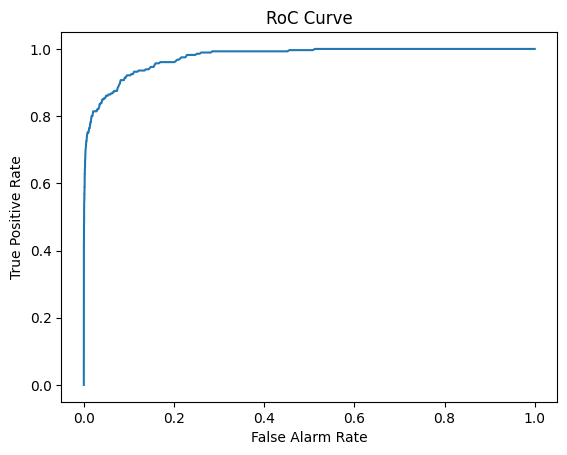

In [23]:
plot_roc(similarity_matrix)

ANS: minimum threshold = min L2, maximum threshold = max L2

## T10

In [24]:
def calculate_roc_with_eer(input_mat):
    """
    TODO: Calculate a list of true_pos_rate and a list of false_neg_rate from the given matrix.
    """

    tpr_list = []
    far_list = []

    n_steps = 1000

    min_cutoff = input_mat.min()
    max_cutoff = input_mat.max()

    for threshold in np.linspace(min_cutoff, max_cutoff, n_steps):
        tpr, far = evaluate_performance(input_mat, threshold)
        tpr_list.append(tpr)
        far_list.append(far)
    
    # Find EER
    tpr_array = np.array(tpr_list)
    far_array = np.array(far_list)
    fnr_array = 1 - tpr_array
    min_index = np.argmin(np.abs(far_array - fnr_array))
    eer = tpr_array[min_index]

    # Find Recall(TPR) at 0.1% FAR
    far01_index = np.argmin(np.abs(far_array - 0.001))
    recall_at_01_far = tpr_array[far01_index]


    return tpr_list, far_list, eer, recall_at_01_far

tpr_list, far_list, eer, recall_at_01_far = calculate_roc_with_eer(similarity_matrix)
print(f"EER is {eer} and\nRecall at 0.1% false alarm rate is {recall_at_01_far}")

EER is 0.9071428571428571 and
Recall at 0.1% false alarm rate is 0.5428571428571428


## T11

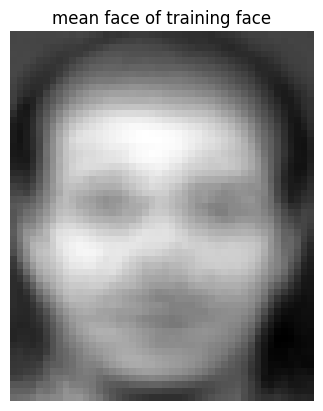

In [25]:
meanface = T.sum(axis = 0) / T.shape[0]

plt.title('mean face of training face')
plt.axis('off')
plt.imshow(meanface.reshape(image_height, image_width), cmap='gray')
plt.show()

## T12

In [26]:
covariance_matrix = np.cov(T.T)

# print(f"""
# - Size of covariances matrix: ({T.shape[1]},{T.shape[1]})
# - Rank of covariances matrix: {min(T.shape[1], T.shape[0]-1)}
# """)

print(f"""
- Size of covariances matrix: {covariance_matrix.shape}
- Rank of covariances matrix: {np.linalg.matrix_rank(covariance_matrix)}
""")


- Size of covariances matrix: (2576, 2576)
- Rank of covariances matrix: 119



## T13

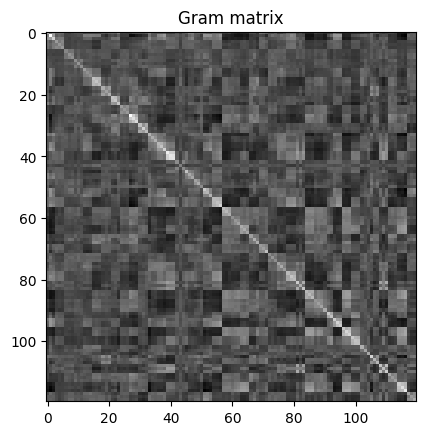

In [27]:
# TODO: Compute gram matrix.
gram_matrix = np.matmul(T-meanface, (T-meanface).T)
plt.title(f'Gram matrix')
plt.imshow(gram_matrix, cmap='gray')

In [28]:
# eigenvalues = np.linalg.eigvals(gram_matrix)
# print(np.sum(eigenvalues > 1e-10))

print(f"""
- Size of gram matrix : {gram_matrix.shape}
- Rank of gram matrix : {gram_matrix.shape[0] - 1}
- Expected non-zero eigenvalues : {gram_matrix.shape[0] - 1}
""")


- Size of gram matrix : (120, 120)
- Rank of gram matrix : 119
- Expected non-zero eigenvalues : 119



## T14

ANS: Yes, Gram matrix is symmetric matrix because the inner product of two vectors is commutative ($X^TX$ which $G_{i,j} = X_iX_j$ and $G_{j,i} = X_jX_i$ so $G_{i,j} = G_{j,i}$)

## T15

In [29]:
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

def calculate_eigenvectors_and_eigenvalues(matrix):
    """
    TODO: Calculate eigenvectors and eigenvalues,
    then sort the eigenvalues and eigenvectors in descending order.

    Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
    """

    eigenvalues, eigenvectors = np.linalg.eigh(matrix)
    eigenvalues = eigenvalues[::-1]
    eigenvectors = eigenvectors[:, ::-1]
    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)

def test_eigenvalues_eigenvectors():
    # Dot product of an eigenvector pair should equal to zero.
    assert np.round(eigenvectors[10].dot(eigenvectors[20]), 10) == 0.0

    # Check if eigenvalues are sorted.
    assert list(eigenvalues) == sorted(eigenvalues, reverse = True)

test_eigenvalues_eigenvectors()

In [30]:
gram_evalues, gram_evectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)
print(f"Number of non-zero eigenvalues of Gram matrix : {np.sum(gram_evalues>1e-10)}")

Number of non-zero eigenvalues of Gram matrix : 119


## T16

In [31]:
total_variance = gram_evalues.sum()

top95_idx = 0
current_variance = 0
while current_variance < total_variance*0.95 and top95_idx < len(gram_evalues):
    current_variance += gram_evalues[top95_idx]
    top95_idx += 1
top95_idx -= 1

print(f"""
Total variance : {total_variance:3,.2f}
95% of variace use {top95_idx+1} eigenvalues
""")


Total variance : 6,853.80
95% of variace use 64 eigenvalues



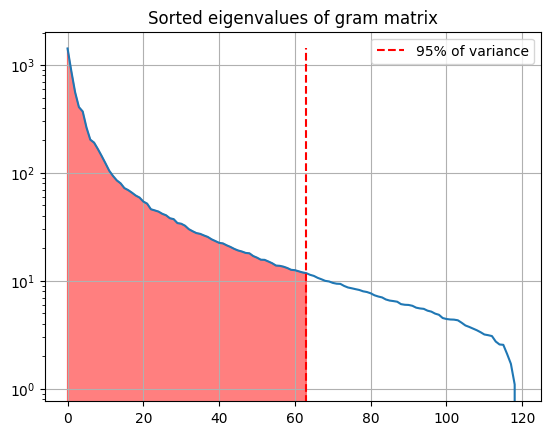

In [32]:
plt.title("Sorted eigenvalues of gram matrix")
plt.plot(gram_evalues)

# 95% line
plt.vlines(top95_idx,
           ymin=0,
           ymax=gram_evalues.max(),
           color='red',
           linestyle='--',
           label=r'95% of variance')

# Fill 95%
plt.fill_between(np.arange(top95_idx+1),
                 gram_evalues[:top95_idx+1],
                 color='red',
                 alpha=0.5)

plt.yscale('log')
plt.legend()
plt.grid()

## T17

In [33]:
# TODO: Compute v, then renormalize it.

# Compute v
v = np.matmul((T-meanface).T, gram_evectors)
# Renormalize
v = v / np.linalg.norm(v, axis=0)

v.shape

(2576, 120)

In [34]:
def test_eignevector_cov_norm(v):
    assert (np.round(np.linalg.norm(v, axis=0), 1) == 1.0).all()

test_eignevector_cov_norm(v)

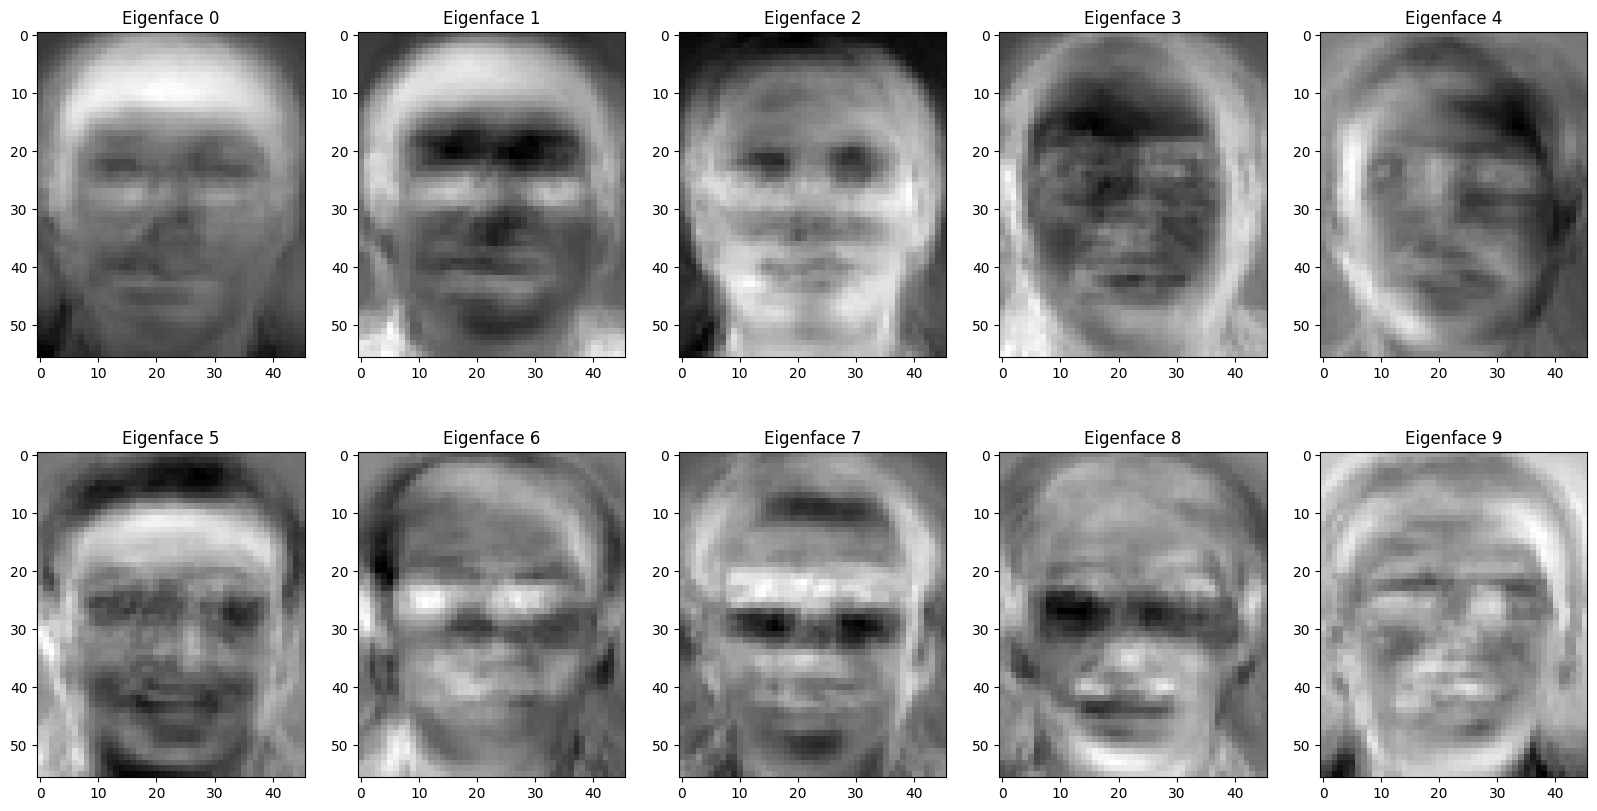

In [35]:
# TODO: Show the first 10 eigenvectors as images.

plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title(f"Eigenface {i}")
    plt.imshow(v[:, i].reshape(xf.shape[2], xf.shape[3]), cmap='gray')

## T18

ANS: First eigenvector capture hair and Second eigenvector capture the lighting on the face. I think these 2 vectors is likely captured biggest variances of original images.

## T19

In [36]:
def calculate_projection_vectors(matrix, meanface, v):
    """
    TODO: Find the projection vectors on v from given matrix and meanface.
    """

    projection_vectors = np.matmul(matrix-meanface, v)

    return projection_vectors

In [37]:
# TODO: Get projection vectors of T and D, then Keep first k projection values.

k = 10
T_reduced = calculate_projection_vectors(T, meanface, v)[:, :k]
D_reduced = calculate_projection_vectors(D, meanface, v)[:, :k]


def test_reduce_dimension():
    assert T_reduced.shape[-1] == k
    assert D_reduced.shape[-1] == k

test_reduce_dimension()

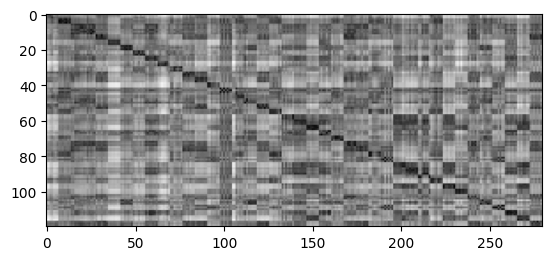

In [38]:
# TODO: Get similarity matrix of T_reduced and D_reduced

similarity_matrix_reduced = generate_similarity_matrix(T_reduced, D_reduced)
plt.imshow(similarity_matrix_reduced, cmap='gray')

In [39]:
# TODO: Find EER and the recall rate at 0.1% FAR.

tpr_list, far_list, eer, recall_at_01_far = calculate_roc_with_eer(similarity_matrix_reduced)
print(f"EER is {eer} and\nRecall at 0.1% false alarm rate is {recall_at_01_far}")

EER is 0.9214285714285714 and
Recall at 0.1% false alarm rate is 0.5178571428571429


## T20

In [40]:
k_best_eer = 0
best_eer = 0

for k in range(5, 15):
    T_reduced = calculate_projection_vectors(T, meanface, v)[:, :k]
    D_reduced = calculate_projection_vectors(D, meanface, v)[:, :k]
    similarity_matrix_reduced = generate_similarity_matrix(T_reduced, D_reduced)
    tpr_list, far_list, eer, recall_at_01_far = calculate_roc_with_eer(similarity_matrix_reduced)
    if best_eer == 0 or eer > best_eer:
        best_eer = eer
        k_best_eer = k

print(f"Best EER is {best_eer} at k={k_best_eer}")

Best EER is 0.9214285714285714 at k=10


## OT2

In [41]:
def MSE(x, y):
    return np.mean(np.square(x-y))

MSE : 0.006148335016488305


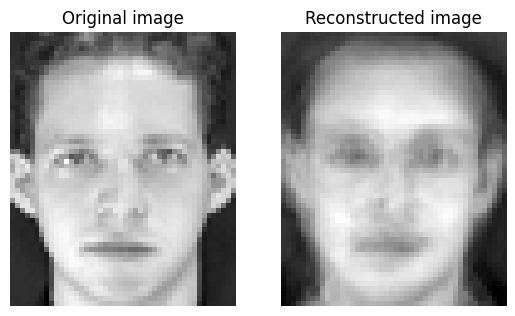

In [42]:
k = 10
first_image_original = T[0]
first_image_reduced = calculate_projection_vectors(first_image_original, meanface, v)[:k]
first_image_reconstructed = meanface + np.matmul(first_image_reduced, v[:, :k].T)

plt.subplot(1, 2, 1)
plt.imshow(first_image_original.reshape(xf.shape[2], xf.shape[3]), cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(first_image_reconstructed.reshape(xf.shape[2], xf.shape[3]), cmap='gray')
plt.title('Reconstructed image')
plt.axis('off')

print(f"MSE : {MSE(first_image_original, first_image_reconstructed)}")

## OT3

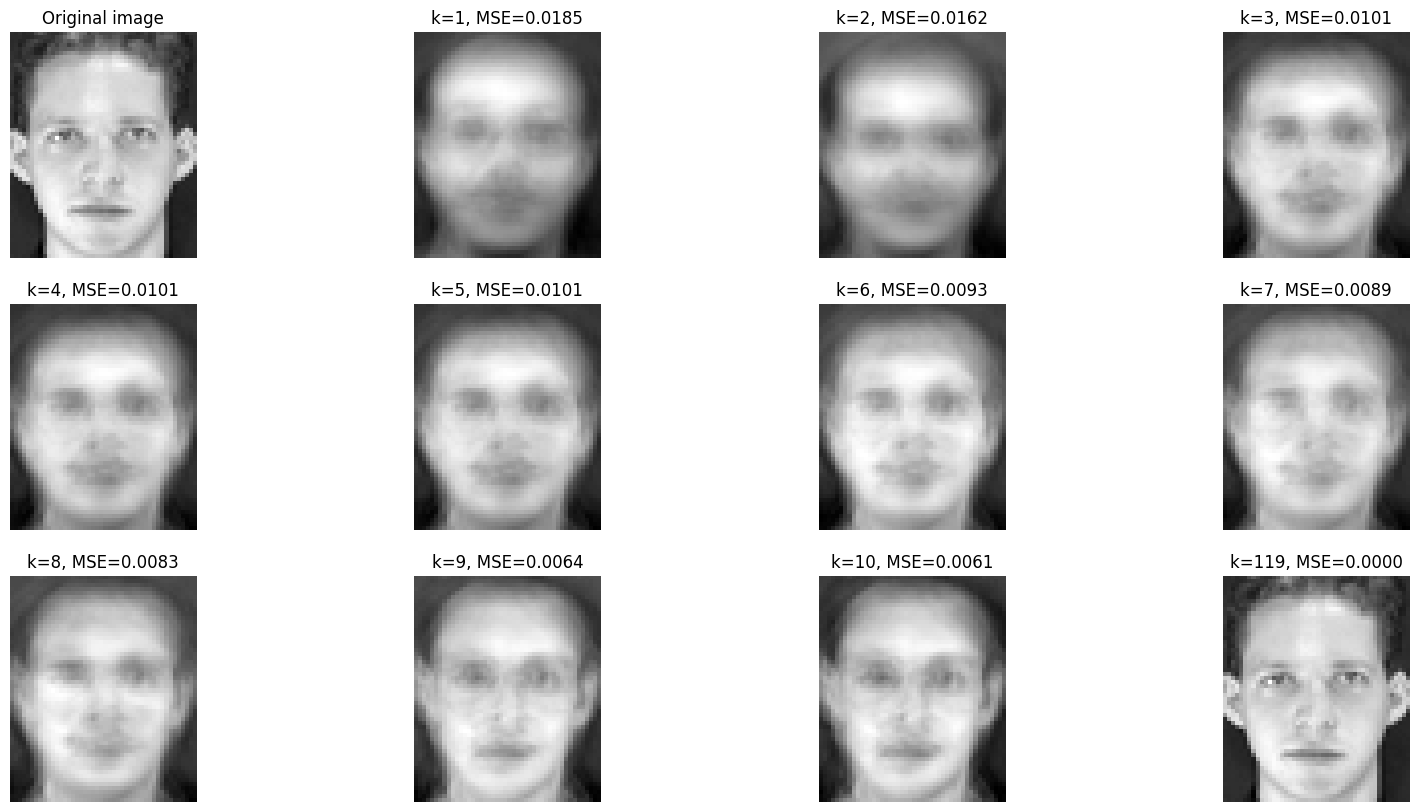

In [43]:
# Plot original image
plt.figure(figsize=(20, 10))
plt.subplot(3, 4, 1)
plt.imshow(T[0].reshape(xf.shape[2], xf.shape[3]), cmap='gray')
plt.title('Original image')
plt.axis('off')

k_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 119])
mse_array = np.zeros(k_array.shape[0], dtype=float)

for index, k in enumerate(k_array):
    plt.subplot(3, 4, index+2)
    image_reduced = calculate_projection_vectors(T[0], meanface, v)[:k]
    image_reconstructed = meanface + np.matmul(image_reduced, v[:, :k].T)
    mse = MSE(T[0], image_reconstructed)

    mse_array[index] = mse
    plt.imshow(image_reconstructed.reshape(xf.shape[2], xf.shape[3]), cmap='gray')
    plt.title(f'k={k}, MSE={mse:.4f}')
    plt.axis('off')

plt.show()

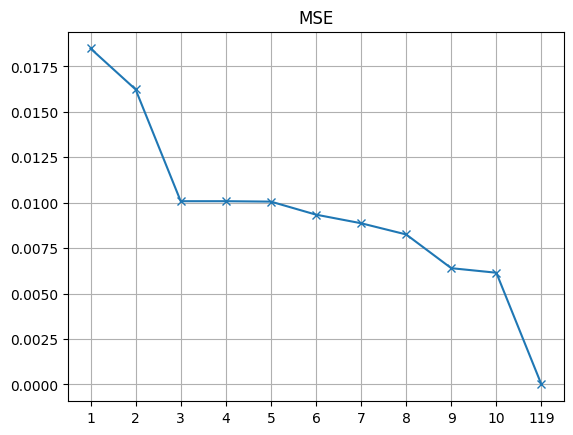

In [44]:
plt.plot(np.arange(len(mse_array)), mse_array, marker='x')
plt.xticks(np.arange(len(k_array)), k_array)
plt.grid()
plt.title('MSE')
plt.show()

## OT4

In [45]:
size_per_original_image = xf.shape[2]*xf.shape[3]

k = 10

print(f"""
original version (1M images of size {xf.shape[2]}x{xf.shape[3]}) 
\t- size per image : {size_per_original_image*4:3,} bytes
\t- total : {1e6*size_per_original_image*4:3,} bytes

compress version (1M images of size {xf.shape[2]}x{xf.shape[3]}) 
\t- size for projection value ({k} eigenvalues) : {k*4:3,} bytes/each
\t- eigenface : {size_per_original_image*4:3,} bytes/each
\t- meanface : {size_per_original_image*4:3,} bytes
\t- total : {1e6*k*4 + k*size_per_original_image*4 + size_per_original_image*4:3,} bytes

Compress ratio : {1e6*size_per_original_image*4 / (1e6*k*4 + k*size_per_original_image*4 + size_per_original_image*4):3,}
""")


original version (1M images of size 56x46) 
	- size per image : 10,304 bytes
	- total : 10,304,000,000.0 bytes

compress version (1M images of size 56x46) 
	- size for projection value (10 eigenvalues) :  40 bytes/each
	- eigenface : 10,304 bytes/each
	- meanface : 10,304 bytes
	- total : 40,113,344.0 bytes

Compress ratio : 256.8721271405346



## T21

In [46]:
# TODO: Define dimension of PCA.

n_dim = T.shape[0] - xf.shape[0]
print(f"Dimension : {n_dim}")

# TODO: Find PCA of T and D with n_dim dimension.

T_reduced = calculate_projection_vectors(T, meanface, v)[:, :n_dim]
D_reduced = calculate_projection_vectors(D, meanface, v)[:, :n_dim]

print(T_reduced.shape, D_reduced.shape)

Dimension : 80
(120, 80) (280, 80)


## T22

LDA is symmetric? : False


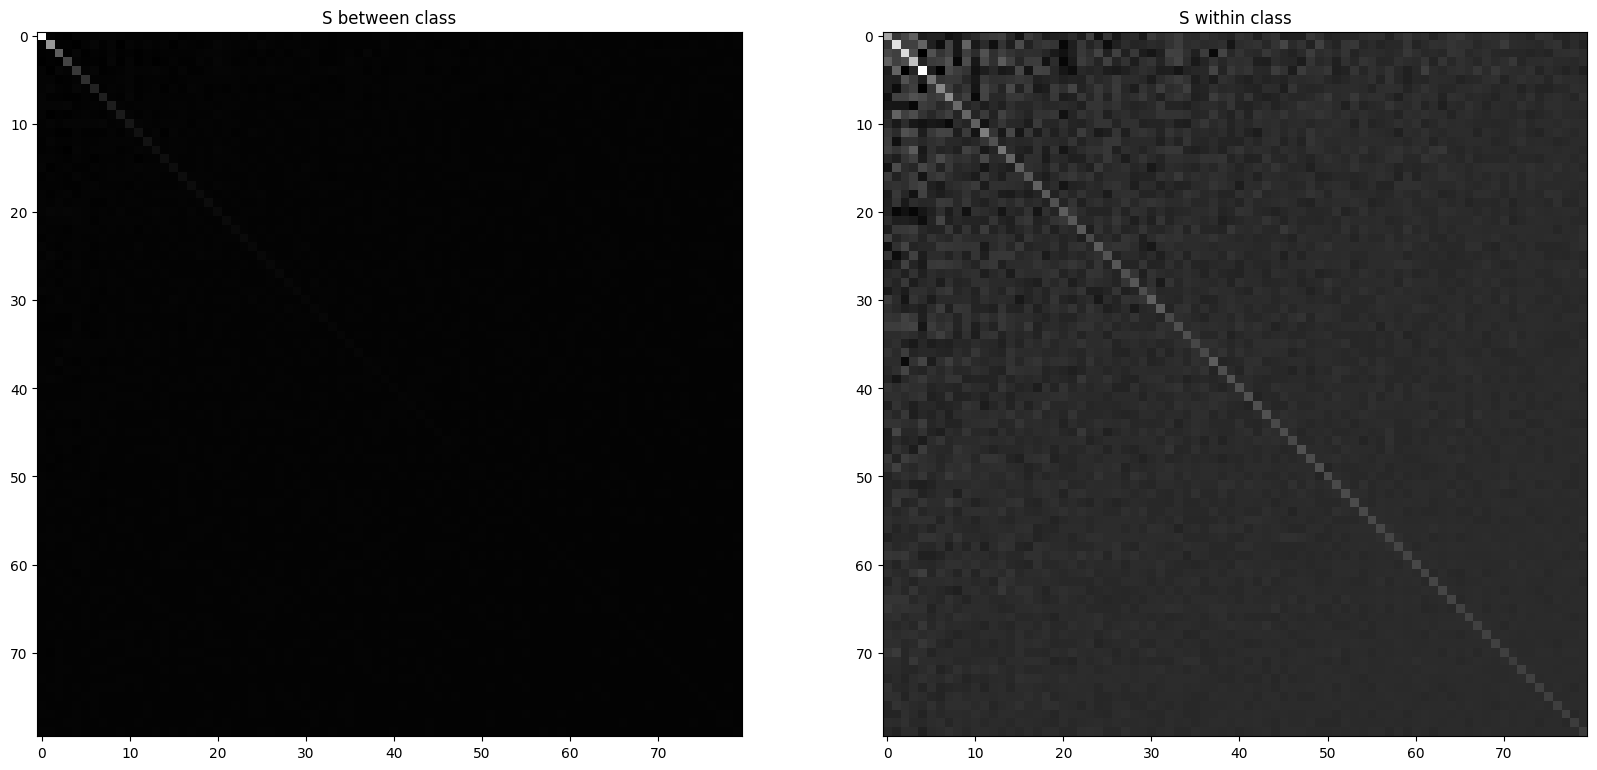

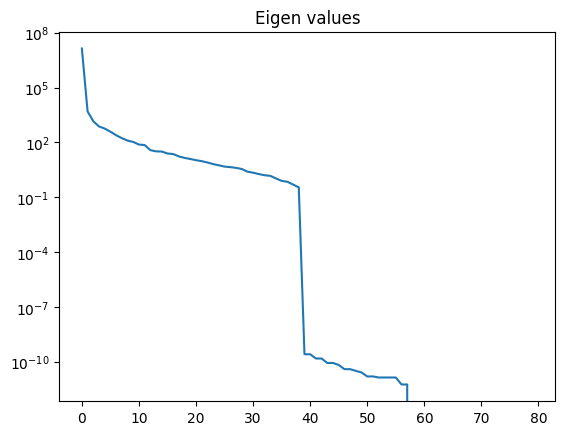

In [47]:
# TODO: Find the LDA projection.
T_reduced_by_class = T_reduced.reshape((40, 3, -1))
class_mean = T_reduced_by_class.mean(axis=1)
all_mean = class_mean.mean(axis=0).reshape(1, -1)

s_b = np.array([np.matmul((class_mean[i]-all_mean).T, (class_mean[i]-all_mean)) for i in range(class_mean.shape[0])]).sum(axis=0)
s_wi = np.array([np.matmul((T_reduced_by_class[i]-class_mean[i]).T, (T_reduced_by_class[i]-class_mean[i])) for i in range(class_mean.shape[0])])
s_w = s_wi.sum(axis=0)

LDA = np.matmul(np.linalg.inv(s_w), s_b)
print(f"LDA is symmetric? : {np.allclose(LDA, LDA.T)}")
LDA_evalues, LDA_evectors = np.linalg.eig(LDA)
sort_index = LDA_evalues.argsort()[::-1]
LDA_evalues = LDA_evalues[sort_index]
LDA_evectors = LDA_evectors[:, sort_index]
LDA_evectors = LDA_evectors.real
LDA_evalues = LDA_evalues.real

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(s_b, cmap='gray')
plt.title("S between class")

plt.subplot(1, 2, 2)
plt.imshow(s_w, cmap='gray')
plt.title("S within class")
plt.show()

plt.title("Eigen values")
plt.plot(LDA_evalues)
plt.yscale('log')

plt.show()

In [48]:
# TODO: Find how many non-zero eigenvalues there are.
print(f"Number of non-zero eigenvalues : {np.where(LDA_evalues>1e-9, 1, 0).sum()}")

Number of non-zero eigenvalues : 39


## T23

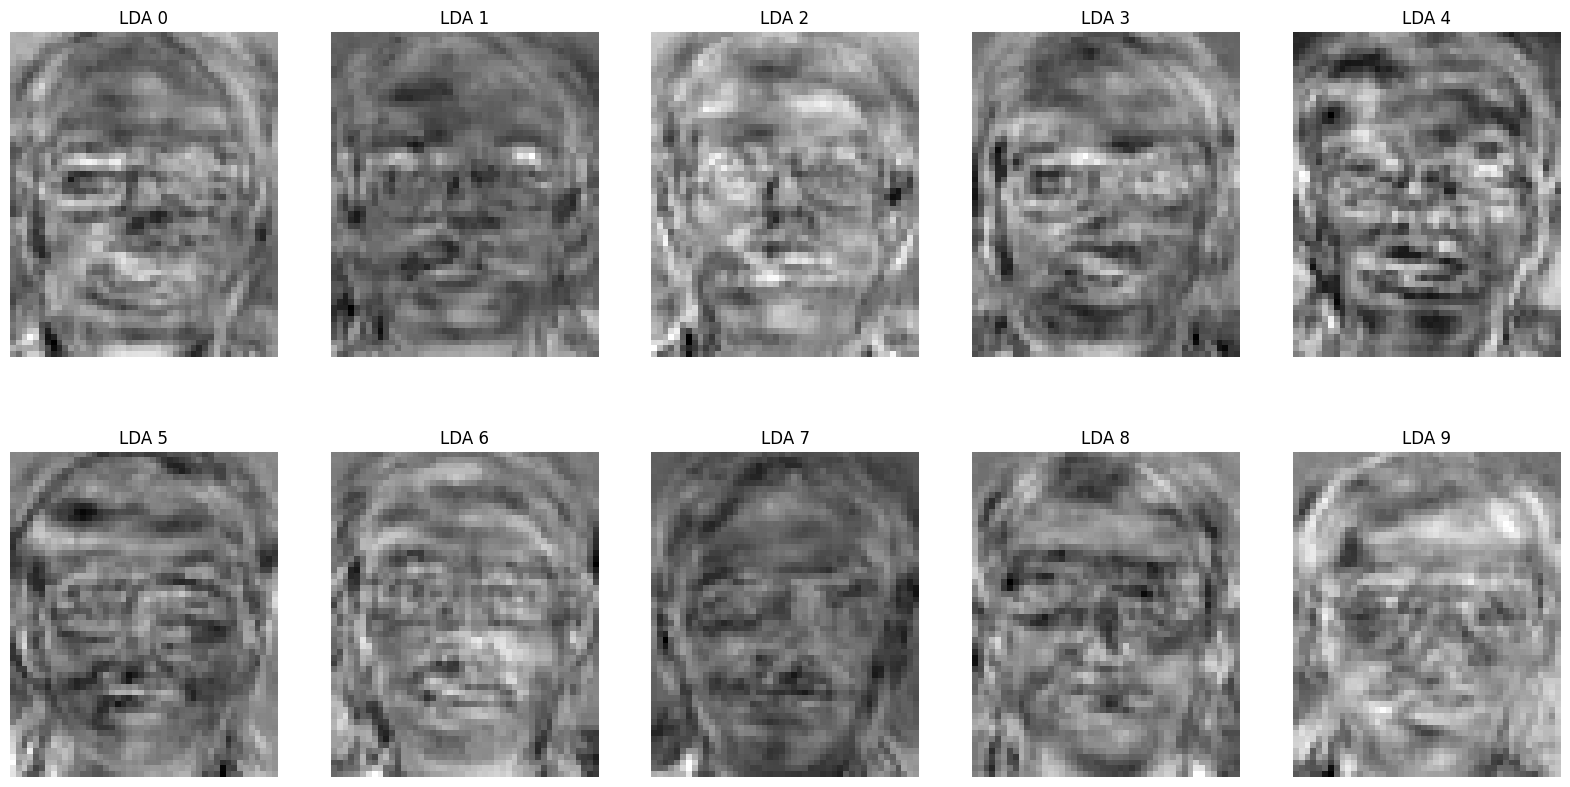

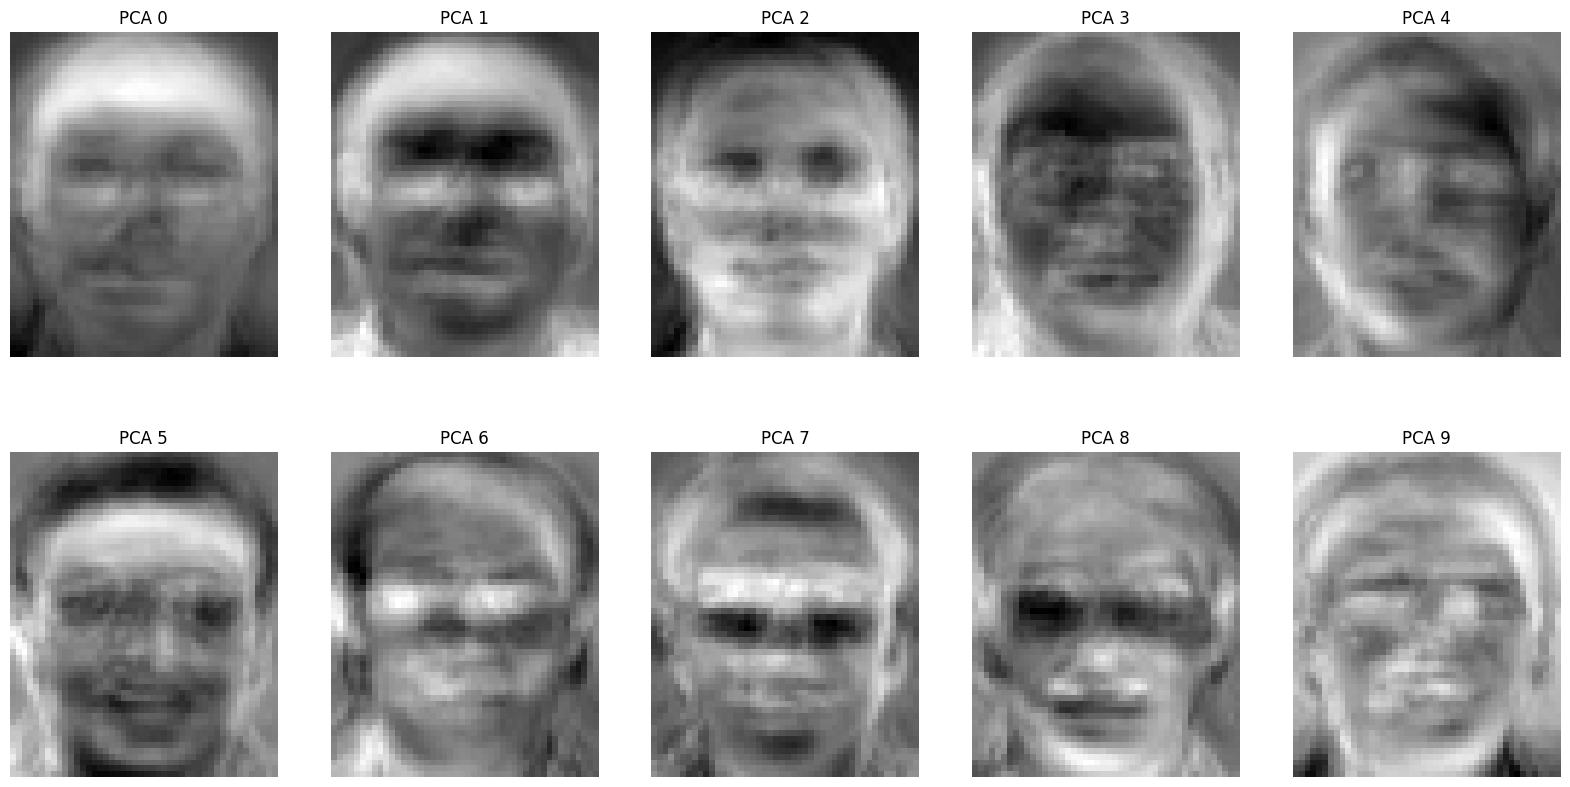

In [49]:
best_10_LDA = LDA_evectors[:, :10]
T_LDA = np.matmul(T_reduced, best_10_LDA)
T_LDA_eigenface = np.matmul(v[:, :n_dim], best_10_LDA)

D_LDA = np.matmul(D_reduced, best_10_LDA)
D_LDA_eigenface = np.matmul(v[:, :n_dim], best_10_LDA)

plt.figure(figsize=(20, 10))
for idx in range(10):
    plt.subplot(2, 5, idx+1)
    plt.imshow(T_LDA_eigenface[:, idx].reshape(xf.shape[2], xf.shape[3]), cmap='gray')
    plt.title(f"LDA {idx}")
    plt.axis('off')

plt.show()

plt.figure(figsize=(20, 10))
for idx in range(10):
    plt.subplot(2, 5, idx+1)
    plt.imshow(v[:, idx].reshape(xf.shape[2], xf.shape[3]), cmap='gray')
    plt.title(f"PCA {idx}")
    plt.axis('off')
plt.show()

## T24

In [50]:
lda_similarity_matrix = generate_similarity_matrix(T_LDA, D_LDA)
_, _, eer, recall_at_01_far = calculate_roc_with_eer(lda_similarity_matrix)
print(f"EER is {eer} and recall rate at 0.1% FAR is {recall_at_01_far}")

EER is 0.8857142857142857 and recall rate at 0.1% FAR is 0.40714285714285714


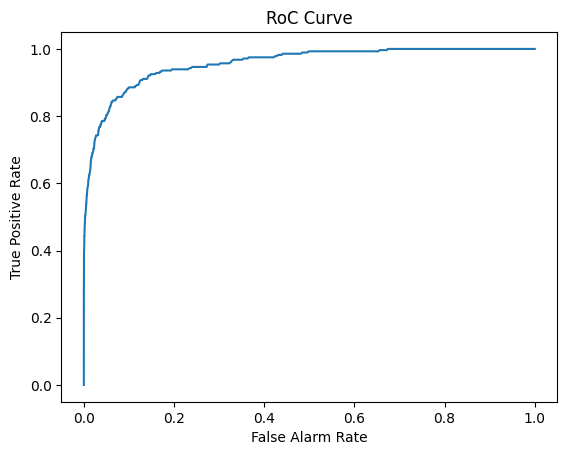

In [51]:
plot_roc(lda_similarity_matrix)

## T25

for No projection
EER is 0.9071428571428571 and recall rate at 0.1% FAR is 0.5428571428571428
for PCA
EER is 0.9321428571428572 and recall rate at 0.1% FAR is 0.6071428571428571
for LDA
EER is 0.8857142857142857 and recall rate at 0.1% FAR is 0.40714285714285714


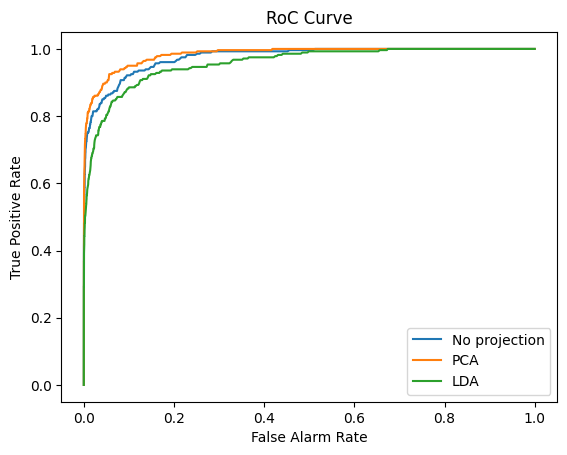

Best EER is 0.9321428571428572 from PCA


In [52]:
setup = {
    'No projection': (T, D),
    'PCA': (T_reduced, D_reduced),
    'LDA': (T_LDA, D_LDA)
}
eer_list = []

for label, (curr_T, curr_D) in setup.items():
    similarity_matrix = generate_similarity_matrix(curr_T, curr_D)
    _, _, eer, recall_at_01_far = calculate_roc_with_eer(similarity_matrix)
    print(f"for {label}")
    print(f"EER is {eer} and recall rate at 0.1% FAR is {recall_at_01_far}")
    
    plot_roc(similarity_matrix, show=False)
    eer_list.append(eer)

plt.legend(['No projection', 'PCA', 'LDA'])
plt.show()

best_eer = max(eer_list)
best_idx = eer_list.index(best_eer)
print(f"Best EER is {best_eer} from {list(setup.keys())[best_idx]}")